# Classifying Gaussian clusters with Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix

## Generate synthetic data

In [2]:
# Define the number of each mixture
number_class_1 = 10
number_class_2 = 10

# Define the mean of each mixture
mean_1 = np.array([0, 0])
mean_2 = np.array([5, 0])

# Define the covariance of each mixture
sigma = 0.8
cov_1 = np.eye(2) * sigma
cov_2 = np.eye(2) * sigma

# Generate clusters
np.random.seed(100)
cluster_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=number_class_1)
cluster_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=number_class_2)

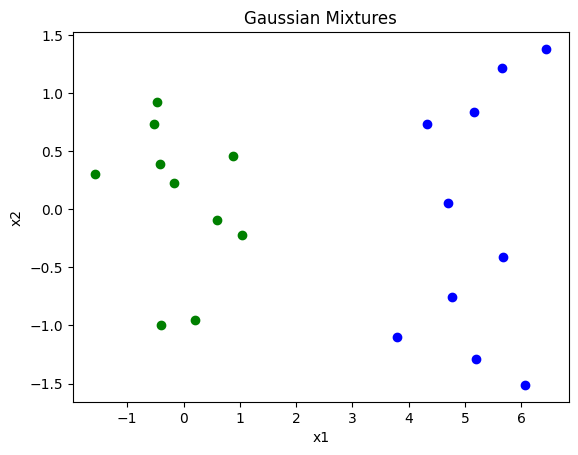

In [3]:
# Plot data
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gaussian Mixtures')
plt.show()

In [4]:
# Create dataset
X_1 = cluster_1
X_2 = cluster_2

# Merge the train features
X = np.vstack((X_1, X_2))
t = np.array([-1] * number_class_1 + [1] * number_class_2).astype(float)

## Support Vector Machine

In [5]:
def support_vector_machine(X_train, t_train):
    """
    Find the parameters w and b in Support Vector Machine
    :param X_train: 
    :param t_train: 
    :return: 
    """
    # Get the number of data points
    N = X_train.shape[0]
    
    # Solve the dual problem using convex optimization library
    P = 2 * (X_train @ X_train.T) * (t_train @ t_train.T)
    P = matrix(P)
    
    q = - np.ones(N)
    q = matrix(q)
    
    G = - np.eye(N)
    G = matrix(G)
    
    h = np.zeros(N)
    h = matrix(h)
    
    A = matrix(t_train.reshape(1, -1))
    b = matrix([0.0])
    
    # Find a
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    a = np.array(sol['x']).reshape(-1)
    
    # Find w
    w = X.T @ (a * t_train)
    
    # Find b
    X_1 = X_train[t_train.astype(int) == -1]
    X_2 = X_train[t_train.astype(int) == 1]
    b = (-0.5) * (np.max(np.dot(X_1, w)) + np.min(np.dot(X_2, w)))
    
    return w, b

In [6]:
# Get the parameters w and b from support vector machine
w, b = support_vector_machine(X_train=X, t_train=t)

     pcost       dcost       gap    pres   dres
 0: -1.6064e+00 -2.6071e+00  4e+01  6e+00  2e+00
 1: -1.5346e+00 -3.1654e-01  4e+00  7e-01  2e-01
 2: -1.5740e-02 -1.6019e-02  8e-02  9e-03  3e-03
 3: -5.2723e-03 -1.2087e-02  7e-03  4e-18  1e-15
 4: -8.4801e-03 -9.1633e-03  7e-04  3e-18  7e-16
 5: -8.9986e-03 -9.0203e-03  2e-05  9e-18  1e-15
 6: -9.0087e-03 -9.0091e-03  5e-07  3e-18  7e-16
 7: -9.0088e-03 -9.0088e-03  5e-09  1e-19  1e-15
Optimal solution found.


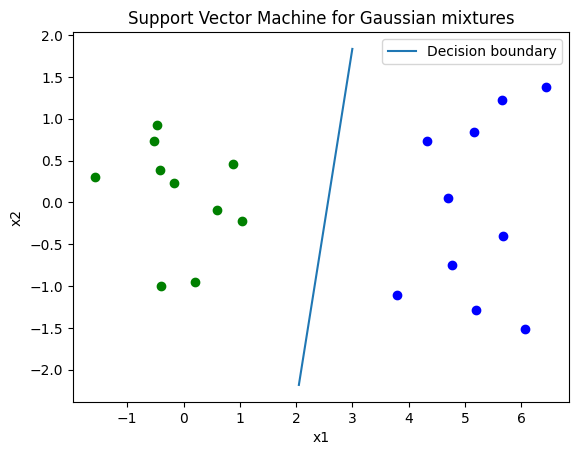

In [9]:
# The w parameters
w_0, w_1, w_2 = b, w[0], w[1]

# Calculate starting and ending points
x_1 = 2.05
y_1 = (-w_0 - w_1 * x_1) / w_2
x_2 = 3
y_2 = (-w_0 - w_1 * x_2) / w_2

# Draw the boundary
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Support Vector Machine for Gaussian mixtures')
plt.plot([x_1, x_2], [y_1, y_2], label='Decision boundary')
plt.legend()
plt.savefig('figures/svm.png')
plt.show()